# Exercise 7

$\newcommand{\ket}[1]{\left|{#1}\right\rangle}$

## 1

Given the ability to perform `cx` and `h` gates, and given a supply of auxiliary qubits in state $|0\rangle$, show that it is possible to perform `x` gates with arbitrarily high probability of success.

You may use measurements to make a astate collapse. For example, if you have a state $1/\sqrt2 (\ket{00} + \ket{11})$ and measure the second qubit, there is a 50% chance t measure 0 and find the first qubit is in the o state
Arbitrary accuracy here means arbitrary high success probability assuming we can use as many auilary qubits as we want.

In [1]:
from qiskit import *
from qiskit.tools.visualization import array_to_latex, plot_histogram
import numpy as np

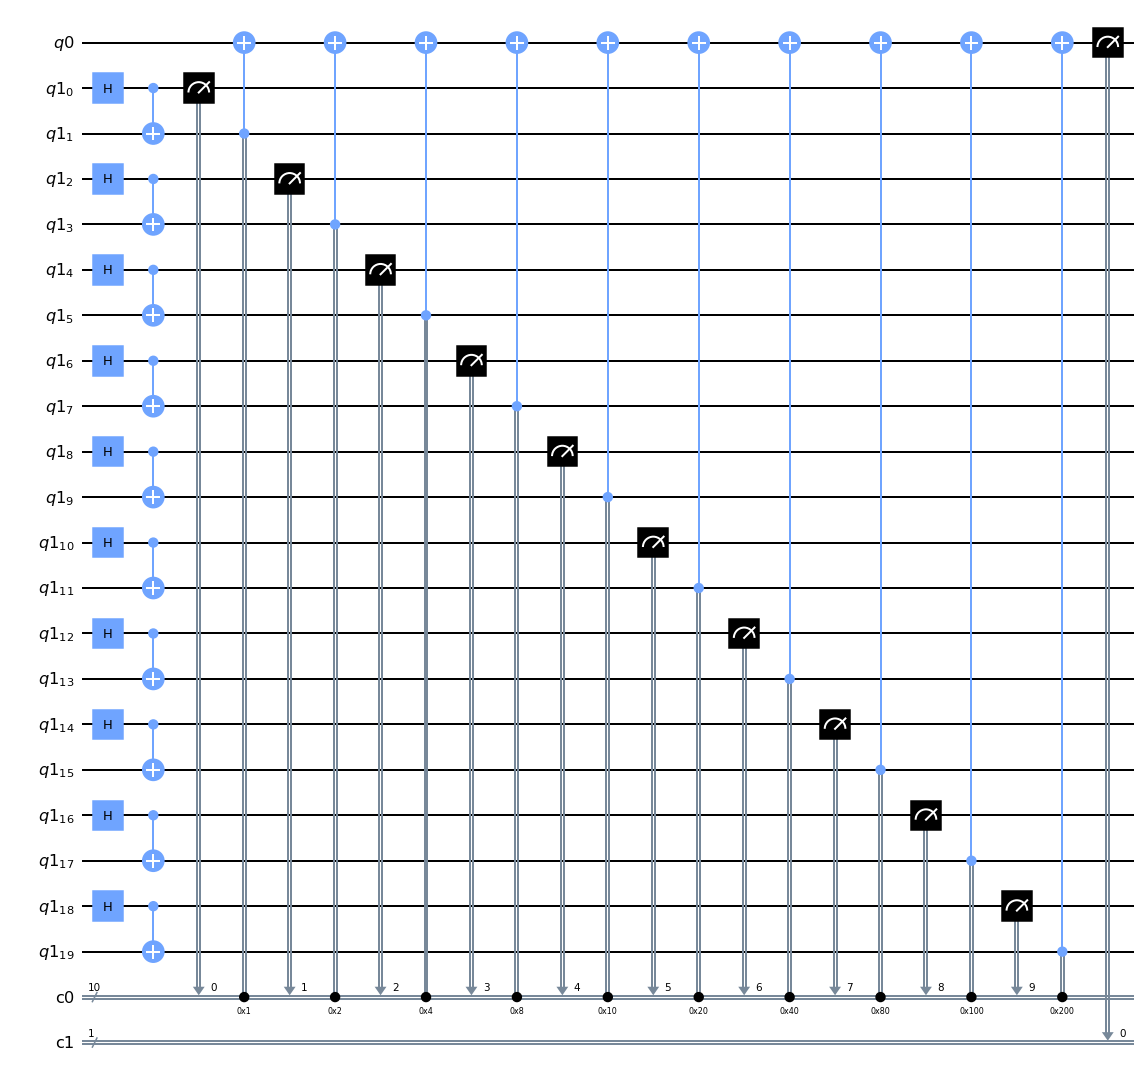

In [2]:
n = 10
qubit = QuantumRegister(1)
auxillary_qubits = QuantumRegister(2*n)
c = ClassicalRegister(n)
result = ClassicalRegister(1)
qc = QuantumCircuit(qubit, auxillary_qubits, c, result)

for i in range(n):
    qc.h(auxillary_qubits[2*i])
    qc.cx(auxillary_qubits[2*i], auxillary_qubits[2*i+1])   # Auxillary qubits 2*i and 2*i+1 are now in state phi+
    qc.measure(auxillary_qubits[2*i], c[i]) # We measure the first qubit into the corresponding classical register
    """ We apply a CNOT controlled on the 2*i auxillary qubit and targetted on the target qubit, 
    but only if the last measurement on the auxilarry qubit 2*i +1 came out as 1, because then we know that the auxilarry qubit 2*i is in 
    state |1> and therefore a x will be performed on the target. """
    qc.cx(auxillary_qubits[2*i +1], qubit[0]).c_if(c, 2**i)
qc.measure(qubit, result)
qc.draw(output='mpl')

In [3]:
job = Aer.get_backend('aer_simulator').run(qc)
result = job.result()
counts = result.get_counts(qc)
print("Probability of performing an X: ", sum([counts[key] for key in counts if key[0] == '1']) /(sum([counts[key] for key in counts if key[0] == '0']) + sum([counts[key] for key in counts if key[0] == '1'])))

Probability of performing an X:  0.99609375


The probability of not getting an 1 on any of the pair of auxiallary qubits is $\frac{1}{2^n}$, where $n$ is the number of auxillary qubits. In case we have infinite qubits this becomes $\lim\limits_{n\to \infty} \frac1{2^n} = 0$

## 2

A general $n$-qubit state can be written

$$
| \psi \rangle = \sum_x c_x |x\rangle = \sum_x \Re (c_x) |x\rangle +  i \Im (c_x) |x\rangle,
$$

where the $|x\rangle$ here denote the $n$-qubit Z basis states.

For each such state we can write an equivalent state for which all amplitudes are real. Since the complex nature of the amplitudes effectively adds an extra degree of superposition to the state, we need to add an extra qubit to the system to encode the same information. The $n+1$ qubit state $| \tilde \psi \rangle$ equivalent to $| \psi \rangle$ is then

$$
| \tilde \psi \rangle = \sum_x \Re (c_x) |x\rangle \otimes |0\rangle +  \Im (c_x) |x\rangle \otimes |1\rangle.
$$

Note that the $i$ in $| \psi \rangle$ is replaced by the $|1\rangle$ state on the extra qubit in $| \tilde \psi \rangle$.

a) For each $n$ qubit unitary $U$ we can define an equivalent $n+1$ qubit unitary $\tilde U$, such that

$$
\tilde U (|x\rangle \otimes |0\rangle) = \widetilde{U |x\rangle}, \,\, \forall x
$$

Write the effects of $\tilde U (|x\rangle \otimes |0\rangle)$ and $\tilde U (|x\rangle \otimes |1\rangle)$ in terms of $U$. 

Hint: $\tilde U \tilde {|\psi\rangle} = \widetilde {U | \psi \rangle}$

$$\widetilde U \tilde{\ket{\psi}} = \widetilde U  \left( \sum_x \Re (c_x) |x\rangle \otimes |0\rangle +  \Im (c_x) |x\rangle \otimes |1\rangle\right) = \widetilde{\left(U \sum_x \Re (c_x) |x\rangle +  i \Im (c_x) |x\rangle\right)}$$

$$=\widetilde{\left((\Re (U) + i \Im (U)) \sum_x \Re (c_x) |x\rangle +  i \Im (c_x) |x\rangle\right)} = \widetilde{\left(\sum_x (\Re (U) + i \Im (U))(\Re (c_x) |x\rangle) +  (\Re (U) + i \Im (U))(i \Im (c_x) |x\rangle)\right)}$$

$$=\widetilde{\left(\sum_x \Re(U) \Re(c_x)\ket x + i \Im(U) \Re(c_x) \ket x + \Re(U)i\Im(c_x) \ket x - \Im(U)\Im(c_x) \ket x \right)}$$

$$= \sum_x \Re(U) \Re(c_x)\ket x \otimes \ket 0+ \Im(U) \Re(c_x) \ket x \otimes \ket 1+ \Re(U)\Im(c_x) \ket x \otimes \ket 1- \Im(U)\Im(c_x) \ket x \otimes \ket 0$$

$$=\sum\limits_x \Re(U)(\Re(c_x) \ket x \otimes \ket 0 + \Im(c_x) \ket x \otimes \ket 1) + \Im(U)(\Re(c_x) \ket x \otimes \ket 1 - \Im(c_x)\ket x\otimes \ket 0)$$

$$=\Re(U)\otimes I\sum\limits_x \Re(c_x) \ket x \otimes \ket 0 + \Im(c_x) \ket x \otimes \ket 1 + \Im(U) \sum\limits_x \Re(c_x) \ket x \otimes \ket 1 - \Im(c_x)\ket x\otimes \ket 0$$

$$=(\Re(U)\otimes I) \tilde {\ket\psi} + (\Im(U)\otimes HXHX) \tilde(\ket\psi)$$

$$(\Re(U) \otimes I + \Im(U)\otimes HXHX) \tilde{\ket \psi} = \tilde U \tilde{\ket \psi}$$

Thus $$\tilde U = (\Re(U) \otimes I + \Im(U)\otimes HXHX)$$

a)
$$ (\ket \psi \otimes \ket 0) = \widetilde {\ket \psi} = \sum_x \Re (c_x) |x\rangle \otimes |0\rangle +  \Im (c_x) |x\rangle \otimes |1\rangle.$$when $\Im(c_x) = 0$ for $c_x$ of basis states of $\ket \psi$.
Thus $$\widetilde U  (\ket \psi \otimes \ket 0)=\sum_x \Re(U) \Re(c_x)\ket x \otimes \ket 0+ \Im(U) \Re(c_x) \ket x \otimes \ket 1+ \Re(U)\Im(c_x) \ket x \otimes \ket 1- \Im(U)\Im(c_x) \ket x \otimes \ket 0 \\= \sum_x \Re(U) \Re(c_x)\ket x \otimes \ket 0+ \Im(U) \Re(c_x) \ket x \otimes \ket 1$$

$$(\ket \psi \otimes \ket1) = \widetilde {\ket \psi} = \sum_x \Re (c_x) |x\rangle \otimes |0\rangle +  \Im (c_x) |x\rangle \otimes |1\rangle.$$ when $\Re (c_x) = 0$ for $c_x$ of all basis states of $\ket \psi$.

Thus $$\widetilde U  (\ket \psi \otimes \ket 0)=\sum_x \Re(U) \Re(c_x)\ket x \otimes \ket 0+ \Im(U) \Re(c_x) \ket x \otimes \ket 1+ \Re(U)\Im(c_x) \ket x \otimes \ket 1- \Im(U)\Im(c_x) \ket x \otimes \ket 0 \\= \sum_x \Re(U)\Im(c_x) \ket x \otimes \ket 1- \Im(U)\Im(c_x) \ket x \otimes \ket 0 $$

b) Show that any two gates $\tilde U$ and $\tilde V$ will combine equivalently to their counterparts $U$ and $V$, i.e.,

$$
\tilde U \tilde V = \widetilde{U V}.
$$

$$(\Re(U)\otimes I + \Im(U)\otimes HXHX)(\Re(V)\otimes I + \Im(V)\otimes HXHX) = \Re(U)\Re(V)\otimes I + \Re(U)\Im(V)\otimes HXHX  + \Im(U)\Re(V)\otimes HXHX - \Im(U)\Im(V)\otimes I = \Re(UV)\otimes I + \Im(UV)\otimes HXHX$$

c) The controlled-$S$ gate is a two qubit gate which applies a phase of $i$ when the two qubits are in the state $|11\rangle$ and acts trivially otherwise. Find the equivalent gate acting on real states, and express it in terms of gates that we have seen already during the course.

Hint:
- use the toffoli gate (ccx)
- You may need $CCZ = H_3 CCX H_3$

Using the description described above we can write the CS gate like this:$$CS = (I - |1\rangle\langle1|) + i |1\rangle\langle1| = \begin{pmatrix}1&&0&&0&&0\\0&&1&&0&&0\\0&&0&&1&&0\\0&&0&&0&&i\end{pmatrix}$$

When applying a phase of $i$ to a state, we make the real part of the state complex and the complex part real (with an additional coefficient of $-1$). In real states this can be thought as applying the following gates to the third qubit:
$$H X H X$$

We want this behaviour to be controlled on the first two qubits, as when they are in the state $\ket{11}$ in the complex states, there is no imaginary part to the amplitudes, so the initial state is just $\ket{110}$. We can do this using some Toffolis controlled on qubit 2 and 1 and targeted on qubit 0, because they will only apply an X if the first two qubits are in state $\ket{11}$ and if not they act trivially, which also allows the hadamards of undoing eachother:$$H_3 CCX^{2,1,0} H_3 CCX^{2,1,0}$$

## 3

a) Given all Clifford gates and any an additional non-Clifford, universal quantum computation can be perfomed. Given this fact, show that the controlled-$S$ and Hadamard are a universal gate set.

Hints:
- You use that H, S and CNOT are sufficient to generate all Clifford gates.

We have to show that we can apply a CNOT, a S using only the CS and the Hadamard, because we need to be able to generate all Cliffords, which we can do using those thee gates. This ability combined with the fact that the CS is non-Clifford allows us to perform general quantum computation.

First we show that CS is in fact non-Clifford: $$CS (X \otimes I )CS^\dagger = \begin{pmatrix}0&&0&&1&&0\\0&&0&&0&&i\\1&&0&&0&&0\\0&&-i&&0&&0\end{pmatrix} \not \in P_2$$

Then we show that we can perform a CNOT using only CS and Hadamards: $$(I\otimes H)\cdot \text{CS} \cdot \text{CS} \cdot (I\otimes H) = \begin{pmatrix}1&&0&&0&&0\\0&&1&&0&&0\\0&&0&&0&&1\\0&&0&&1&&0\end{pmatrix} = \text{CNOT}$$

Finally we use the same principle of using auxillary qubits from exercise 1 to apply S gates on the qubit we want using only controlled-S gates.

Using the fact that we can perform these three gates (H, S and CNOT), we can perform any Clifford (assumed beforehand) and the fact that CS is non-Clifford, we show that the controlled-Gate combined with the Hadamard make up a universal gate set.

b) Show that the Toffoli and Hadamard can simulate universal quantum computation on real states.

Hints:
- Use problem 2 and problem 3a
- "Simulate": simulate arbitrary (complex) quantum operations by equivalent operations on real states.

Because we proved in 3a) that the controlled-S and H are universal for complex states and the effects of the controlled-S can be simulated on real states using the Toffoli and the Hadamard (2c)), we can deduce that the Toffoli and Hadamard are universal for real states.